<a href="https://colab.research.google.com/github/Daniel-AlCa/Sales-Predictions/blob/main/sales_predictions_for_alimentary_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Semana1
import pandas as pd
filename = "/content/drive/MyDrive/Coding Dojo/Codificación de Coding Dojo/Proyecto1/sales_predictions.csv"

df = pd.read_csv(filename)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#Semana2
#1) ¿Cuántas filas y columnas?
print("1-Numero de filas y columnas:" , df.shape)
print("")

#2) ¿Cuáles son los tipos de datos en cada variable?
print('2-Los tipos de datos en cada variable son los siguientes:')
print("")
df.dtypes

#3)¿Hay duplicados? Si es el caso, eliminen algunos duplicados.
print("3-Número de duplicados:",df.duplicated().sum())
print("")

#4)Identifiquen los valores faltantes.
print("4-Se aprecian Valores Faltantes en las columans Item_Weight y Outlet_Size")
print("")

print(df.isna().sum())
print("")

1-Numero de filas y columnas: (8523, 12)

2-Los tipos de datos en cada variable son los siguientes:

3-Número de duplicados: 0

4-Se aprecian Valores Faltantes en las columans Item_Weight y Outlet_Size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64



In [4]:
#5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).
#Completando valores faltantes
df.head()
df['Item_Weight'].isna().sum()
wna=df['Item_Weight'].isna()
#df['Item_Weight']=top_10['Item_Weight'].apply(lambda x: x - top_10['Count'].min() )


#Hallar el peso moda Item Identifier 

pesos=df.groupby(['Item_Identifier'])[['Item_Weight']].mean()
pesos=pesos.reset_index()


for i in range(len(df)):
  X=df['Item_Identifier'][i]

  if (pd.isnull(df.at[i,'Item_Weight'])):


    F=pesos['Item_Identifier']==X
    Temp=pesos.loc[F,:]['Item_Weight'].sum()
    
    df['Item_Weight'][i]=Temp
    


<ipython-input-4-2c2eed2d32fb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight'][i]=Temp


In [5]:
#Eliminando los valores de peso 0

df['Item_Weight'].isnull().sum()
W0=[]

for x in range(0,len(df)):
  T=df['Item_Weight'][x]
  
  if ((T)==0):
    W0.append(x)
    
df=df.drop(W0)
df.reset_index(drop=True, inplace=True)
df



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8514,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8515,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8516,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8517,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
df.isna().sum()
#Aun quedan nulos en Outlet Size

ONA=df[df['Outlet_Size'].isna()]
ONA['Outlet_Type'].value_counts()



#vemos como estos se comportan en el data frame
dfoi1=df['Outlet_Type']=='Grocery Store' 
dfoi2=df['Outlet_Type']=='Supermarket Type1'

dfoit=df[dfoi1 | dfoi2 ]
dfoit

dfoit.groupby(['Outlet_Type','Outlet_Size'])['Outlet_Type'].count()
#para OUT010 Grocery store siempre es small
#para OUT045 y OUT017  Tier 2 store siempre es small

equivalencias = {"OUT010" :"Small",
            "OUT045": "Small",
           "OUT017" : "Small"}

df["Outlet_Size"] = df["Outlet_Size"].fillna(df['Outlet_Identifier'].map(equivalencias))


In [7]:

#6) Confirmen que no hay valores faltantes después de abordarlos.
print("6-Se confirma que no hay valores faltantes: ")
print('')
print(df.isna().sum())
print('')
#7)Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 
print('7-Buscando valores incosistentes:')
print(df.nunique())
print("Se apreciaron y corregieron valores incosistentes en Item_Fat_Content")

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
print(df['Item_Fat_Content'].value_counts())

#8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)
print('')
print("8-Estadísticas resumidas para variables numércias:")
df.describe()

6-Se confirma que no hay valores faltantes: 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7-Buscando valores incosistentes:
Item_Identifier              1555
Item_Weight                   446
Item_Fat_Content                5
Item_Visibility              7876
Item_Type                      16
Item_MRP                     5936
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64
Se apreciaron y corregieron valores incosistentes en Item_Fat_Content
Low Fat    5516
Regular    3003
Name: Item_

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<ipython-input-8-6ffe71f0d713>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


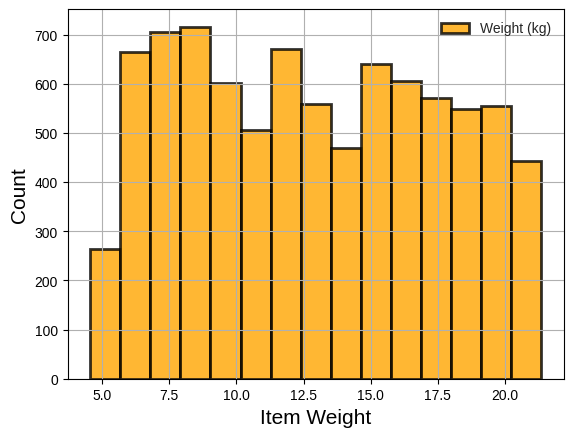

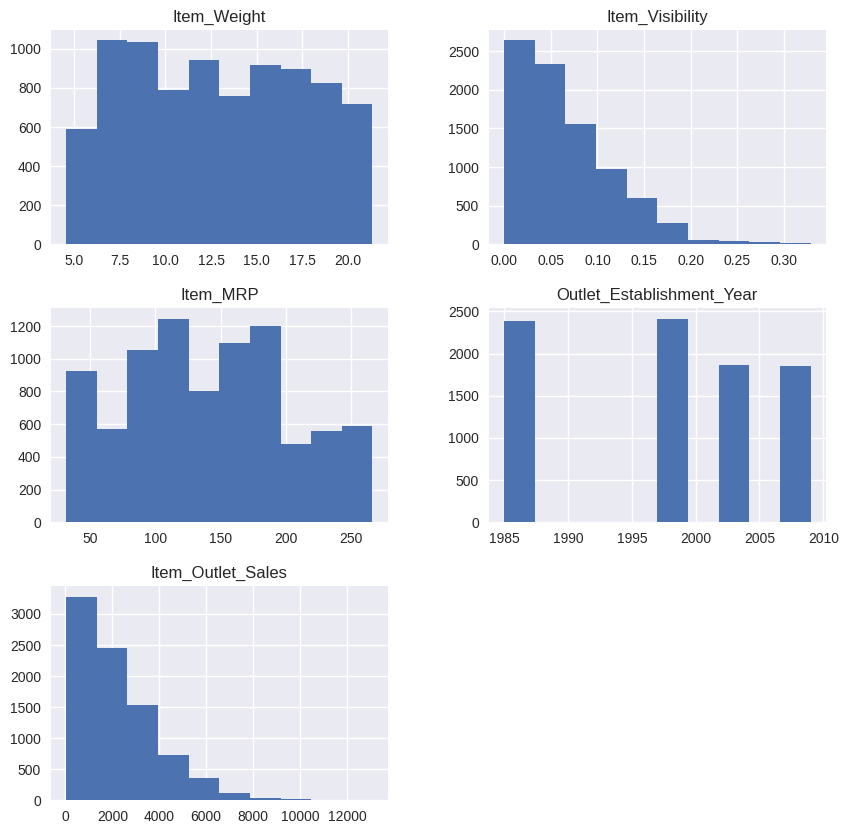

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Semana 3
#Histograma para ver las distribuciones de diversas características en el conjunto de datos.

df['Item_Weight'].hist(label="Weight (kg)", alpha = 0.8,color="orange",linewidth=2,edgecolor='k',bins=15);


plt.xlabel("Item Weight", fontsize = 15);
plt.ylabel("Count", fontsize = 15);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);
plt.style.use('seaborn');
plt.legend();

df.hist(figsize=(10,10));

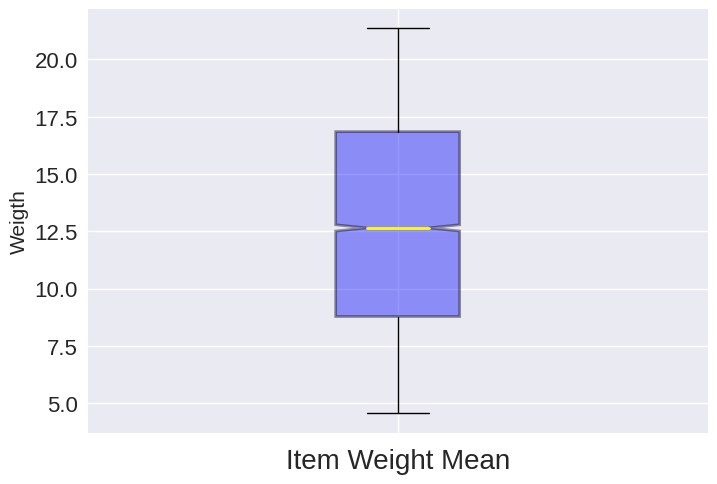

In [9]:
#Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

weight = df.loc[:,'Item_Weight']

fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot([weight], notch = True, labels=[''],
           widths = .2,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );


plt.xlabel("Item Weight Mean", fontsize = 20);
plt.ylabel("Weigth", fontsize = 15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

<ipython-input-10-77093b7f4c82>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

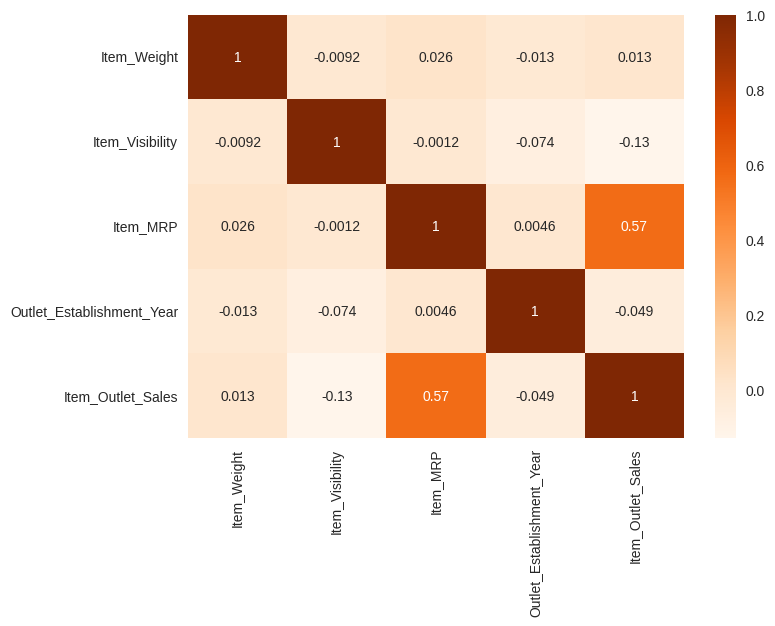

In [10]:
#Mapa de calor de la correlación entre las características.
corr = df.corr()
corr
import seaborn as sns

sns.heatmap(corr, cmap = 'Oranges', annot = True)

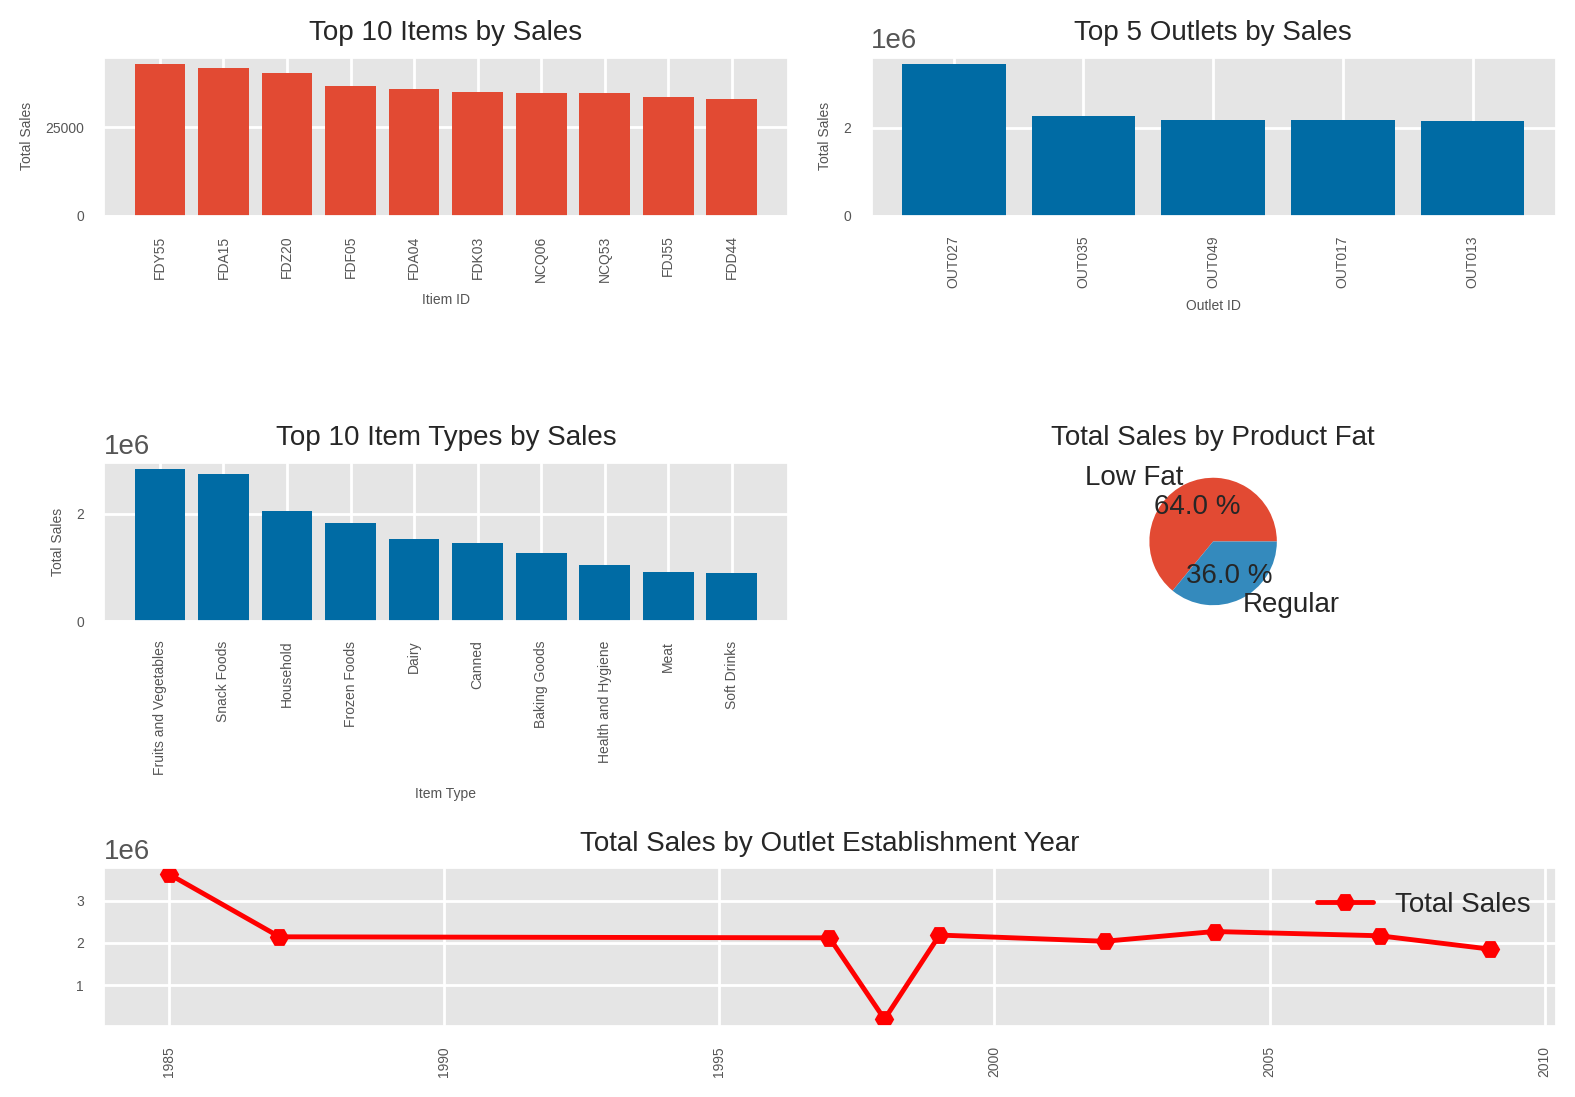

In [12]:
#Semana 4
df['Item_Outlet_Sales']=round(df['Item_Outlet_Sales'],2)


df1=df.groupby('Item_Identifier')[['Item_Outlet_Sales']].sum()
df1=df1.reset_index()
df1=df1.sort_values('Item_Outlet_Sales',ascending=False).head(10)
df1

df2=df.groupby('Outlet_Identifier')[['Item_Outlet_Sales']].sum()
df2=df2.reset_index()
df2=df2.sort_values('Item_Outlet_Sales',ascending=False).head(5)
df2

df3=df.groupby('Item_Type')[['Item_Outlet_Sales']].sum()
df3=df3.reset_index()
df3=df3.sort_values('Item_Outlet_Sales',ascending=False).head(10)
df3

df4=df.groupby('Item_Fat_Content')[['Item_Outlet_Sales']].sum()
df4=df4.reset_index()
df4=df4.sort_values('Item_Outlet_Sales',ascending=False).head(10)
df4

df5=df.groupby('Outlet_Establishment_Year')[['Item_Outlet_Sales']].sum()
df5=df5.reset_index()
df5=df5.sort_values('Outlet_Establishment_Year',ascending=True).head(10)
df5

#Graficos
plt.figure(dpi = 200)

#1
plt.style.use('ggplot');
plt.subplot(3,2,1)
plt.bar(df1['Item_Identifier'],df1['Item_Outlet_Sales'])
plt.ylabel("Total Sales", fontsize = 5);
plt.xlabel("Itiem ID", fontsize = 5);
plt.xticks(fontsize=5);
plt.yticks(fontsize=5);
plt.title("Top 10 Items by Sales",fontsize = 10);
plt.xticks(rotation=90,fontsize=5);
plt.tight_layout ()

#2
plt.style.use('tableau-colorblind10')

plt.subplot(3,2,2)

plt.bar(df2['Outlet_Identifier'],df2['Item_Outlet_Sales'])
plt.ylabel("Total Sales", fontsize = 5);
plt.xlabel("Outlet ID", fontsize = 5);
plt.xticks(rotation=90,fontsize=5);
plt.yticks(fontsize=5);
plt.title("Top 5 Outlets by Sales",fontsize = 10)
plt.tight_layout ()

#3
plt.style.use('tableau-colorblind10')
plt.subplot(3,2,3)
plt.bar(df3['Item_Type'],df3['Item_Outlet_Sales'])
plt.ylabel("Total Sales", fontsize = 5);
plt.xlabel("Item Type", fontsize = 5);
plt.xticks(rotation=90,fontsize=5);
plt.yticks(fontsize=5);
plt.title("Top 10 Item Types by Sales",fontsize = 10)
plt.tight_layout ()

#4
plt.style.use('ggplot');
plt.subplot(3,2,4)
plt.pie(df4['Item_Outlet_Sales'],labels=df4['Item_Fat_Content'],autopct="%0.1f %%");
plt.title("Total Sales by Product Fat",fontsize = 10);
plt.tight_layout ()


#5

plt.style.use('ggplot');
plt.subplot(3,1,3)
plt.plot(df5['Outlet_Establishment_Year'],df5['Item_Outlet_Sales'],"rH-",label="Total Sales")
plt.title("Total Sales by Outlet Establishment Year",fontsize = 10);
plt.legend();
plt.yticks(fontsize=5);
plt.xticks(fontsize=5);
plt.tight_layout ();
plt.xticks(rotation=90,fontsize=5);

In [17]:
#Semana 5: Machine LEarning
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

#No se imputaran datos, se trabajara con la ultima version del data frame ya que se completo de una manera optima
#Identifiquen el objetivo (X) y las características (y): Asignen la columna "Item_Outlet_Sales" como el objetivo y el resto de las variables relevantes como el matriz de características.  
  # Se elimina la columna objetivo e 'Item_Identifier' para no generar ruido en las columnas de la tabla del modelo
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])
y = df['Item_Outlet_Sales']

X.info()

#Realicen un train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8519 non-null   float64
 1   Item_Fat_Content           8519 non-null   object 
 2   Item_Visibility            8519 non-null   float64
 3   Item_Type                  8519 non-null   object 
 4   Item_MRP                   8519 non-null   float64
 5   Outlet_Identifier          8519 non-null   object 
 6   Outlet_Establishment_Year  8519 non-null   int64  
 7   Outlet_Size                8519 non-null   object 
 8   Outlet_Location_Type       8519 non-null   object 
 9   Outlet_Type                8519 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 665.7+ KB


In [18]:
# Selectores

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='float64')

#Instanciadores
  # Scaler
scaler = StandardScaler()
  # One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

#   Utilizar pipelines y transformadores de columnas para completar las siguientes tareas:
    # Realizar una codificación one-hot a las características nominales.
    # Escalar las columnas numéricas.
numeric_pipe = make_pipeline(scaler)
numeric_pipe

categorical_pipe = make_pipeline(ohe)
categorical_pipe

#   Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

#   Todos los datos de preprocesamiento deben estar contenidos en un único objeto de preprocesamiento.
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

preprocessor.fit(X_train)

#   Utilizar el objeto de preprocesamiento para transformar los datos de manera adecuada, evitar la fuga de datos para dejarlos listos para el modelado. Muestren los arrays de NumPy resultantes.

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [20]:
#   Muestren los arrays de NumPy resultantes.
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of Train data is', X_train_processed.shape)
print('shape of Test data is', X_test_processed.shape)
print('\n')

print(X_train_processed)
print(X_test_processed)

#Solo para Verificar:
Xtrain=pd.DataFrame(X_train_processed)
Xtrain.describe()

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of Train data is (6389, 41)
shape of Test data is (2130, 41)


[[ 0.73966219 -0.70557556  1.83797352 ...  0.          1.
   0.        ]
 [-0.19656335  1.30400847 -0.28141255 ...  0.          0.
   0.        ]
 [-1.66977343  0.3463181   1.69116347 ...  1.          0.
   0.        ]
 ...
 [ 1.5682756   1.08837392 -0.74905057 ...  1.          0.
   0.        ]
 [ 1.60055924 -0.22039966 -0.37557106 ...  1.          0.
   0.        ]
 [-1.07790671 -1.28403877 -0.51653555 ...  1.          0.
   0.        ]]
[[ 1.20239435 -0.62001575 -0.14255106 ...  1.          0.
   0.        ]
 [-1.32433849 -0.71466504 -0.97084289 ...  0.          1.
   0.        ]
 [-0.5624446  -0.91966562 -0.85645665 ...  0.          0.
   0.        ]
 ...
 [ 1.35305134  0.67360977 -0.46279096 ...  1.          0.
   0.        ]
 [ 1.49294711 -1.18161002  1.9885676

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
count,6.389000e+03,6.389000e+03,6.389000e+03,6389.000000,6389.000000,6389.00000,6389.000000,6389.000000,6389.000000,6389.000000,...,6389.000000,6389.000000,6389.000000,6389.000000,6389.00000,6389.000000,6389.000000,6389.000000,6389.000000,6389.000000
mean,-8.007368e-17,3.336404e-17,-2.357725e-16,0.646111,0.353889,0.07732,0.029113,0.013304,0.075286,0.077790,...,0.106902,0.331820,0.561277,0.283925,0.32556,0.390515,0.126624,0.653936,0.109094,0.110346
std,1.000078e+00,1.000078e+00,1.000078e+00,0.478213,0.478213,0.26712,0.168135,0.114583,0.263872,0.267862,...,0.309013,0.470904,0.496270,0.450936,0.46862,0.487904,0.332577,0.475751,0.311781,0.313345
min,-1.798908e+00,-1.284039e+00,-1.760360e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.680631e-01,-7.606590e-01,-7.623397e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-5.666758e-02,-2.320898e-01,3.243527e-02,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.795580e-01,5.558569e-01,7.224537e-01,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.815784e+00,5.141129e+00,2.004548e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
